# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Iriarte Delfina
    
ID: 1231682

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1231682
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 
X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)


(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [53 55 45 56 38 55 55 51 46 46]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


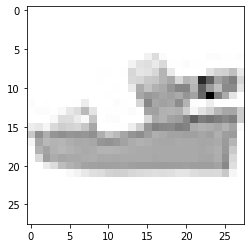

LABEL: 5
INPUT:


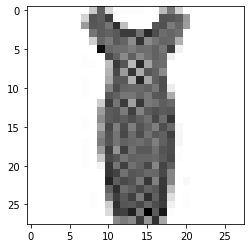

LABEL: 3
INPUT:


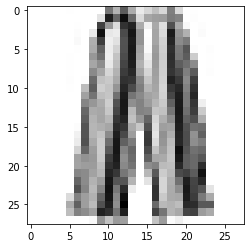

LABEL: 1
INPUT:


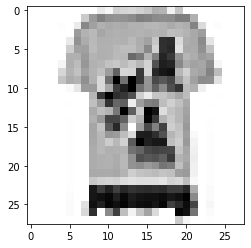

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

svc = SVC(gamma=1, kernel = 'linear', random_state = ID)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL')    
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()


print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)


print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter for', params, 'is=', mean, '+-', std *2)
     


C:\Users\delir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR LINEAR KERNEL
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      5947
           1       0.98      0.94      0.96      5945
           2       0.59      0.66      0.62      5955
           3       0.78      0.85      0.81      5944
           4       0.72      0.49      0.59      5962
           5       0.87      0.87      0.87      5945
           6       0.48      0.51      0.50      5945
           7       0.84      0.88      0.86      5949
           8       0.94      0.88      0.91      5954
           9       0.91      0.88      0.89      5954

    accuracy                           0.78     59500
   macro avg       0.78      0.78      0.78     59500
weighted avg       0.78      0.78      0.78     59500


Best estimator found by grid search:
SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
degree = 2

svc = SVC( kernel = 'poly', degree = degree, random_state = ID)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)



print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()


print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:") 
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter for', params, 'is=', mean, '+-', std *2)
     


C:\Users\delir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 2  KERNEL
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5947
           1       0.98      0.94      0.96      5945
           2       0.62      0.62      0.62      5955
           3       0.82      0.79      0.81      5944
           4       0.69      0.54      0.61      5962
           5       0.77      0.89      0.83      5945
           6       0.45      0.58      0.50      5945
           7       0.86      0.86      0.86      5949
           8       0.95      0.85      0.90      5954
           9       0.90      0.88      0.89      5954

    accuracy                           0.77     59500
   macro avg       0.78      0.77      0.77     59500
weighted avg       0.78      0.77      0.77     59500


Best estimator found by grid search:
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.05, kernel='poly',
    max_iter=-1, probability=False, ran

## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.], 'degree':[2,3,4]}

#run SVM with poly of higher degree kernel
#degree = 3

svc = SVC(kernel = 'poly', degree = degree, random_state = ID)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()


print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
#ADD YOUR CODE 
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)
   
print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter for', params, 'is=', mean, '+-', std *2)
    
#Still the acuraccy is better for degree 2
      


C:\Users\delir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 2  KERNEL
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5947
           1       0.98      0.94      0.96      5945
           2       0.62      0.62      0.62      5955
           3       0.82      0.79      0.81      5944
           4       0.69      0.54      0.61      5962
           5       0.77      0.89      0.83      5945
           6       0.45      0.58      0.50      5945
           7       0.86      0.86      0.86      5949
           8       0.95      0.85      0.90      5954
           9       0.90      0.88      0.89      5954

    accuracy                           0.77     59500
   macro avg       0.78      0.77      0.77     59500
weighted avg       0.78      0.77      0.77     59500


Best estimator found by grid search:
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.05, kernel='poly',
    max_iter=-1, probability=False, ran

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC( kernel = 'rbf', random_state = ID)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)


print ('RESULTS FOR RBF KERNEL')

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()


print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
#ADD YOUR CODE 
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)
 
print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter C =', params, 'is=', mean, '+-', std *2)
    

C:\Users\delir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR RBF KERNEL
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      5947
           1       0.98      0.94      0.96      5945
           2       0.60      0.69      0.64      5955
           3       0.78      0.86      0.82      5944
           4       0.73      0.49      0.59      5962
           5       0.88      0.89      0.88      5945
           6       0.50      0.51      0.51      5945
           7       0.85      0.88      0.87      5949
           8       0.94      0.91      0.92      5954
           9       0.91      0.89      0.90      5954

    accuracy                           0.79     59500
   macro avg       0.79      0.79      0.78     59500
weighted avg       0.79      0.79      0.78     59500


Best estimator found by grid search:
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=1231

## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

We can see that the scores are the similar. If I change the seed the value of the rgf model is better (but not so much)

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = clf.best_estimator_
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.046000
Best SVM test error: 0.214487


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [202 196 211 204 201 197 205 185 187 212]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV

parameters = {'kernel':('rbf', 'poly'), 'C': [0.05, 0.5, 5, 50, 500], 'gamma':[0.005, 0.05, 0.5,5],  'degree':[2,3]}

#run SVM with rbf kernel

svc = SVC(random_state = ID)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)


print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Score with best parameters:")
print(clf.best_score_)





Best estimator found by grid search:
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=1231682, shrinking=True,
    tol=0.001, verbose=False)
Score with best parameters:
0.8385


In [15]:
best_SVM = clf.best_estimator_
best_SVM.fit(X_train, y_train)

Y_training_prediction_SVM = best_SVM.predict(X_train)
Y_test_prediction_SVM = best_SVM.predict(X_test)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)



Best SVM training error: 0.068500
Best SVM test error: 0.165345


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [16]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score

reg_full =  linear_model.LogisticRegression(C = 1e8, penalty ='none', solver = 'newton-cg')#ADD CODE
reg_full.fit(X_train, y_train)

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_train)  

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(y_train, Y_training_prediction_LR)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test)# COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(y_test, Y_test_prediction_LR)
print('Accuracy of the test model:', accuracy_test)


training_error = 1. - accuracy_training
test_error = 1. - accuracy_test

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)


Accuracy of the training model: 1.0
Accuracy of the test model: 0.7683448275862069
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.231655


### TO DO 9 Then use also some regularization 

In [17]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score

reg_fullLR =  linear_model.LogisticRegressionCV(Cs=[0.01], solver='newton-cg',cv=4, penalty='l2')
reg_fullLR.fit(X_train, y_train)

# prediction on training data
Y_training_prediction_LR = reg_fullLR.predict(X_train)  

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(y_train, Y_training_prediction_LR)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction_LR = reg_fullLR.predict(X_test)# COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(y_test, Y_test_prediction_LR)
print('Accuracy of the test model:', accuracy_test)


training_error = 1. - accuracy_training
test_error = 1. - accuracy_test

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)






Accuracy of the training model: 0.815
Accuracy of the test model: 0.7834655172413794
Best regularized logistic regression training error: 0.185000
Best regularized logistic regression test error: 0.216534


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

We can see that the training error of SVM is better when the size of the training is smaller (probably we are overfitting the data when m is larger - but still they are the same order). On the other hand, we can appreciate that the test error of SVM is better when m is larger (that's something that we expected because we have trained our model with more samples).

In general, we can see that for large samples (m = 2000) 
We can also see when m = 2000 that both training error and test error are better for SVM than for logistic regression (with and without regularization). 

Finally, we can see that the training error for the without regularization is 0 ('ideal') while the training error for the regularization one is 0.185000 as we expected because we are allowing some 'error' to this set when computing regularization. Furthermore, the test error using regularization is smaller than the non regularized one (that is the goal of regularization).  Nevertheless, both quantities are similar (since m is too big the two values converges and is something that we expect - its clearer in the other lab).

#### Summary of results (to be ignored) 
m = 500
Best SVM training error: 0.046000
Best SVM test error: 0.214487

m = 2000
Best SVM training error: 0.068500
Best SVM test error: 0.165345
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.231655
Best regularized logistic regression training error: 0.185000
Best regularized logistic regression test error: 0.216534

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline



In [19]:
#Making Predictions
LR_prediction = reg_fullLR.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)


In [20]:
print(y)
print(SVM_prediction)
print(LR_prediction)



[8 4 5 ... 1 9 2]
[5 1 9 ... 1 9 2]
[5 1 9 ... 1 9 4]


INPUT:


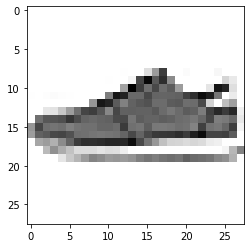

LABEL: 7
misclassifed point= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8 4 5 ... 1 9 2]
11


In [21]:

m_training = 2000

for i in range(m_training):

    if LR_prediction[i] != y[i] and SVM_prediction[i] == y[i]:
        plot_input(X,y,50)
        print('misclassifed point=', X, y)
        print(i)
        break
        
   

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)

print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )


confusion_LR = confusion_matrix(y_test, LR_prediction)#ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5798 5804 5789 5796 5799 5803 5795 5815 5813 5788]

 Confusion matrix SVM  
 
 [[4586   14  139  352   15    4  634    0   54    0]
 [  34 5477   92  187    3    0   11    0    0    0]
 [  91    5 4272   59  817    1  515    0   29    0]
 [ 191   42   72 5168  150    0  153    0   19    1]
 [   7    4  472  370 4451    3  473    0   18    1]
 [   8    0    3    8    0 5254    5  313   24  188]
 [ 965   10  818  199  547    2 3170    0   83    1]
 [   0    0    0    0    0  223    0 5154    5  433]
 [  57    6   63   44   21   55  103   38 5416   10]
 [   0    0    3    6    0  109    5  198    5 5462]]

 Confusion matrix SVM (normalized)   
 
 [[0.79 0.   0.02 0.06 0.   0.   0.11 0.   0.01 0.  ]
 [0.01 0.94 0.02 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.74 0.01 0.14 0.   0.09 0.   0.01 0.  ]
 [0.03 0.01 0.01 0.89 0.03 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.08 0.06 0.77 0.   0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.91 0.   0.05 0. 

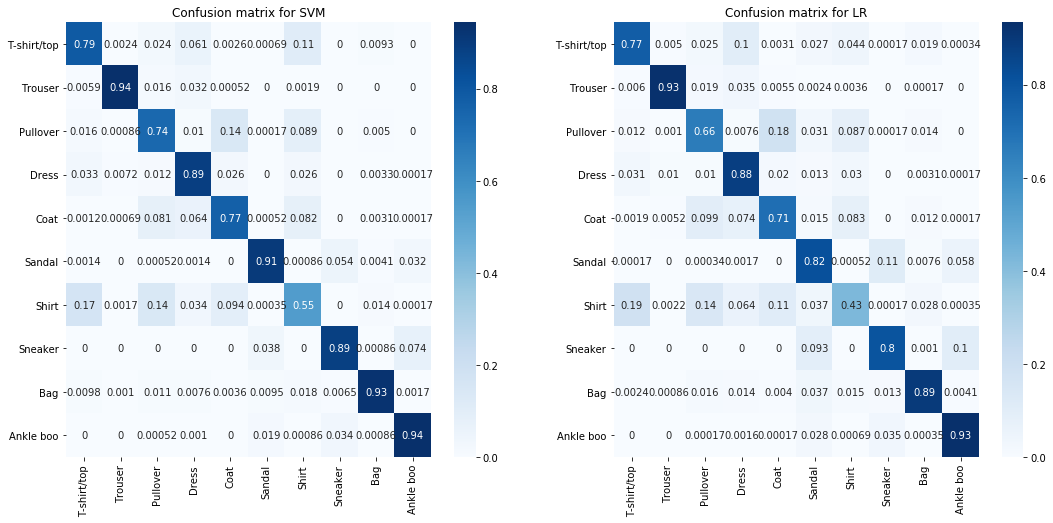

In [23]:
index = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag', 'Ankle boo']  
columns = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag', 'Ankle boo'] 


cm1 =confusion_SVM /counts[:,None]
cm2 =confusion_LR /counts[:,None]

cm1_df = pd.DataFrame(cm1,columns,index)                      
cm2_df = pd.DataFrame(cm2,columns,index)                      

#plt.figure(figsize=(8,6))  
#plt.title('Confusion Matrix for SVM')
#sns.heatmap(cm1_df, annot=True, cmap=plt.cm.Blues)

#plt.figure(figsize=(8,6))
#sns.heatmap(cm2_df, annot=True, cmap=plt.cm.Blues)
#plt.title('Confusion Matrix for LR')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,8))
ax1.set_title('Confusion matrix for SVM')
ax2.set_title('Confusion matrix for LR')
sns.heatmap(cm1_df, annot=True, cmap=plt.cm.Blues, ax=ax1)
sns.heatmap(cm2_df, annot=True, cmap=plt.cm.Blues, ax=ax2)

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others 

The confusion matrix represents how many samples have been classified correctly. We can see in both cases that most of the elements of the diagonal (corresponding to a good classification, meaning T-shirt is indeed a T-shirt) are the ones with the most probability.  For example, using SVM we can see that 79% of the samples of T-shirts have been classified as T-shirts while 17% where classified as Shirt (which is an honest mistake they are really similar). The same happens using LR.  In general, we can also see that most of the elements of the diagonal are greater using SVM than LR (but that's something that we already expected because our accuracy of the SVM was better than the LR thus more points were classified correctly).
 



In [24]:
### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
#a diferent aproach (using the determinant)
from sklearn.preprocessing import normalize
normed_mat_LR = normalize(confusion_LR, axis = 1)
normed_mat_SVM = normalize(confusion_SVM, axis = 1)

